In [4]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# B-splines graph

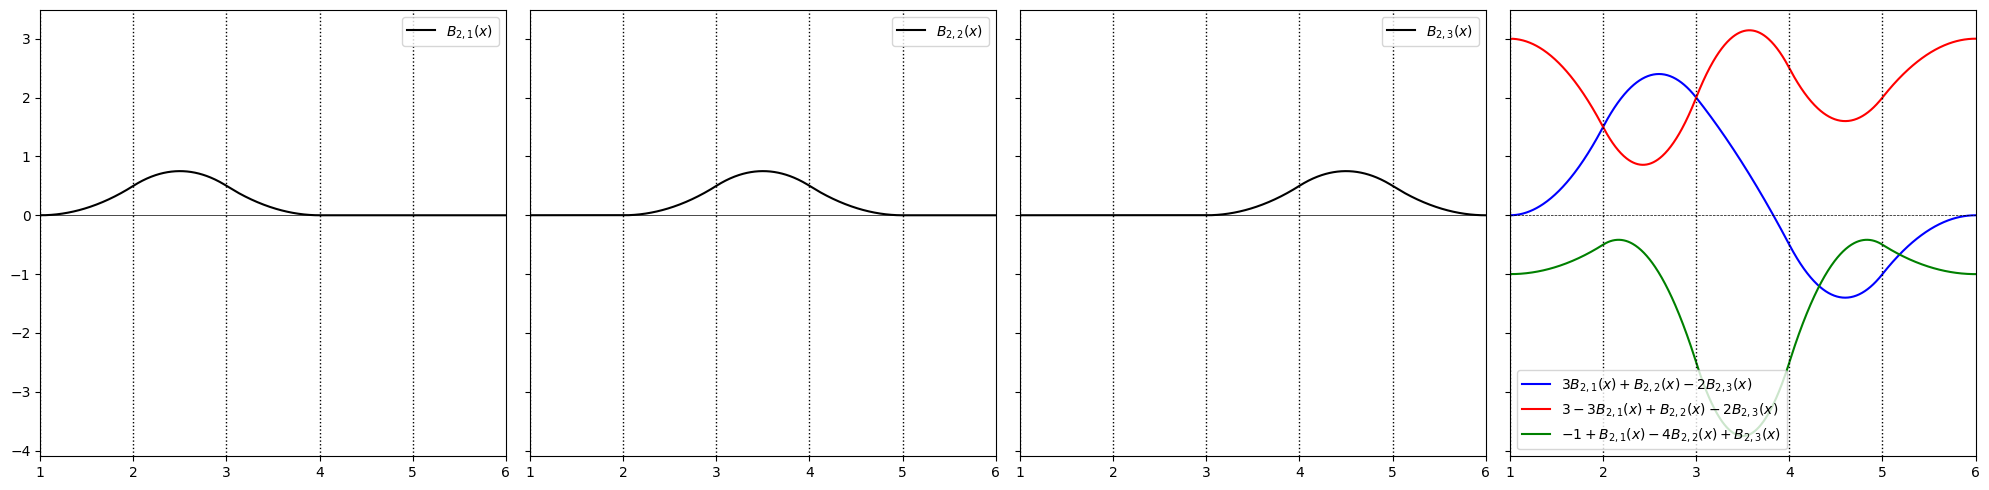

In [3]:
# degree 0
def B_0_1(x):
    return np.where((x >= 1) & (x < 2), 1, 0)

def B_0_2(x):
    return np.where((x >= 2) & (x < 3), 1 , 0)

def B_0_3(x):
    return np.where((x >= 3) & (x < 4), 1, 0)

def B_0_4(x):
    return np.where((x >= 4) & (x < 5), 1 , 0)

def B_0_5(x):
    return np.where((x >= 5) & (x < 6), 1 , 0)

# degree 1
def B_1_1(x):
    return (x - 1) / (2 - 1) * B_0_1(x) + (3 - x) / (3 - 2) * B_0_2(x)

def B_1_2(x):
    return (x - 2) / (3 - 2) * B_0_2(x) + (4 - x) / (4 - 3) * B_0_3(x)

def B_1_3(x):
    return (x - 3) / (4 - 3) * B_0_3(x) + (5 - x) / (5 - 4) * B_0_4(x)

def B_1_4(x):
    return (x - 4) / (5 - 4) * B_0_4(x) + (6 - x) / (6 - 5) * B_0_5(x)

# degree 2
def B_2_1(x):
    return (x - 1) / (3 - 1) * B_1_1(x) + (4 - x) / (4 - 2) * B_1_2(x)

def B_2_2(x):
    return (x - 2) / (4 - 2) * B_1_2(x) + (5 - x) / (5 - 3) * B_1_3(x)

def B_2_3(x):
    return (x - 3) / (5 - 3) * B_1_3(x) + (6 - x) / (6 - 4) * B_1_4(x)


# linear combinations 
def linear_combination1(x):
    return 3 * B_2_1(x) + B_2_2(x) - 2 * B_2_3(x)
def linear_combination2(x):
    return 3 - 3 * B_2_1(x) + B_2_2(x) - 2 * B_2_3(x)
def linear_combination3(x):
    return -1 + B_2_1(x) - 4* B_2_2(x) + B_2_3(x)

# generate the x values
x = np.linspace(0, 6, 1000)

# list of functions and titles for the first three plots
functions = [B_2_1, B_2_2, B_2_3]
titles = [r"$B_{2,1}(x)$",r"$B_{2,2}(x)$", r"$B_{2,3}(x)$"]

# create the plots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# plot the first three functions
for ax, func, title in zip(axes[:3], functions, titles):
    ax.plot(x, func(x), label=title, color='black', linewidth=1.5)
    ax.axhline(0, color='black', linewidth=0.5)
    for vline in [1, 2, 3, 4, 5]:
        ax.axvline(vline, color='black', linestyle='dotted', linewidth=1)
    ax.set_xlim(1, 6)
    ax.legend()

# plot the rest
ax_combined = axes[3]
ax_combined.plot(x, linear_combination1(x), label=r"$3 B_{2,1}(x) + B_{2,2}(x) - 2 B_{2,3}(x)$", color='blue')
ax_combined.plot(x, linear_combination2(x), label=r"$3 - 3 B_{2,1}(x) + B_{2,2}(x) - 2 B_{2,3}(x)$", color='red')
ax_combined.plot(x, linear_combination3(x), label=r"$-1 + B_{2,1}(x) - 4 B_{2,2}(x) + B_{2,3}(x)$", color='green')

# mark knot boundaries
ax_combined.axhline(0, color='black', linewidth=0.5, linestyle='--')
for vline in [1, 2, 3, 4, 5]:
    ax_combined.axvline(vline, color='black', linestyle='dotted', linewidth=1)

ax_combined.set_xlim(1, 6)
ax_combined.legend()
plt.tight_layout()
plt.savefig('b_splines.png', format='png')
plt.show()